### 概述

人工智能是一个广泛的领域，研究如何让机器或计算机系统表现出类似人类的智能行为。传统的AI方法包括：基于规则、逻辑推理、专家系统等，甚至基于 If-else 的决策系统也可以称为AI系统。而机器学习则是AI中的一个子方法。进一步来说，现在流行的神经网络/深度学习等也是机器学习中的一个子方法。

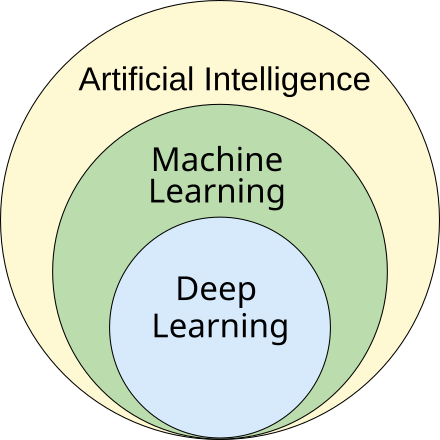

机器学习（Machine Learning）是人工智能（Artificial Intelligence, AI）的一个重要分支，它通过让计算机从数据中学习规律，从而实现对未知数据的预测或决策。与传统的编程方法不同，机器学习不需要明确地编写规则，而是通过算法分析和处理大量数据，自动构建模型，从中提取特征和模式。

机器学习可以分为三大类：监督学习、无监督学习和强化学习。监督学习需要提供带有标签的数据集，模型通过学习输入与输出之间的关系进行预测，例如图像分类和语音识别。无监督学习则用于分析和挖掘数据中的隐藏结构，常见应用包括聚类分析和降维。强化学习通过试错的方式，利用奖励机制来训练智能体完成特定任务，如游戏中的自动决策算法。

在实际应用中，机器学习已广泛应用于许多领域，例如推荐系统、自然语言处理、自动驾驶、医疗诊断和金融风险评估等。随着数据量的增长和计算能力的提升，机器学习正在不断推动技术创新，改变我们的生活方式。

### 监督学习（Supervised Learning）

监督学习是一种通过学习已标注的数据（输入-输出对）来进行预测的机器学习方法。模型以一组输入（特征）和对应的输出（标签）为训练数据，通过学习输入与输出之间的映射关系，能够在遇到新数据时进行预测。

#### 特点：
- **数据特点**：训练数据是带有标签的，也就是说，每个输入样本都对应一个明确的输出。
- **目标**：找到输入特征和输出之间的映射关系，最小化预测值与真实值之间的误差。
- **常见算法**：
  - **回归**（Regression）：用于预测连续值，例如线性回归、支持向量回归（SVR）。
  - **分类**（Classification）：用于预测离散类别，例如逻辑回归、支持向量机（SVM）、决策树、随机森林、神经网络。

#### 应用场景：
- **图像分类**：识别一张图片是猫还是狗。
- **语音识别**：将语音转换为文字。
- **股票价格预测**：根据历史数据预测股票的未来价格。
- **垃圾邮件检测**：判断一封邮件是垃圾邮件还是正常邮件。

### 线性回归
线性回归的核心思想是通过一个 线性方程（即直线或平面等线性结构）来拟合数据点，找到自变量和因变量之间的最佳线性关系。一般使用最小二乘法得到线性方程最优的参数w和b，使得误差最小
$$
Loss = \sum_{i=1}^N (y_i - \tilde{y_i   })^2
$$
其中，$\bm y$是数据点的值，而$\tilde{\bm y} = w \bm x + b$。

测试集真实值: [150 200]
测试集预测值: [136.75799087 188.35616438]
均方误差 (MSE): 155.46485686286468


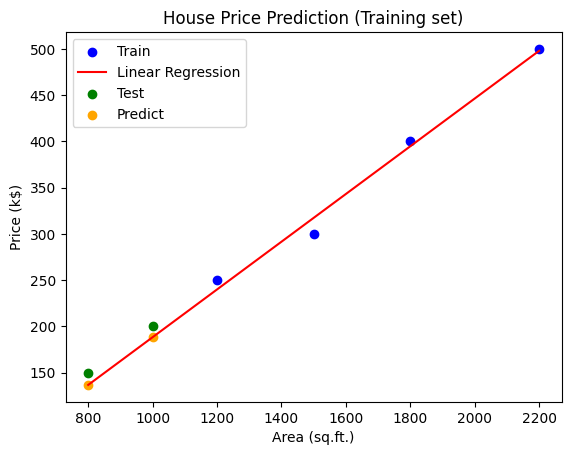

In [ ]:
"""
线性回归 (Linear Regression)
"""
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 示例数据（房屋面积和价格）
# 面积 (平方英尺)
X = np.array([[800], [1000], [1200], [1500], [1800], [2200]])
# 房价 (单位：千美元)
y = np.array([150, 200, 250, 300, 400, 500])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 输出结果
print("测试集真实值:", y_test)
print("测试集预测值:", y_pred)
print("均方误差 (MSE):", mean_squared_error(y_test, y_pred))

import matplotlib.pyplot as plt

# 绘制训练集数据
plt.scatter(X_train, y_train, color='blue', label='Train')
# 绘制拟合直线
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.scatter(X_test, y_test, color='green', label='Test')
plt.scatter(X_test, y_pred, color='orange', label='Predict')
plt.legend()
plt.title('House Price Prediction (Training set)')
plt.xlabel('Area (sq.ft.)')
plt.ylabel('Price (k$)')
plt.show()

### 无监督学习（Unsupervised Learning）

无监督学习是一种在没有标签的情况下，通过分析数据的内在结构来学习模式和规律的机器学习方法。模型不需要明确的输入-输出对，而是通过数据本身的分布特征来发现隐藏的规律。

#### 特点：
- **数据特点**：数据没有标签，仅有输入特征。
- **目标**：挖掘数据的内在结构或关系，例如分类、分组或降维。
- **常见算法**：
  - **聚类（Clustering）**：将数据分为多个组，例如K均值（K-Means）、层次聚类（Hierarchical Clustering）。
  - **降维（Dimensionality Reduction）**：将高维数据映射到低维空间，例如主成分分析（PCA）、t-SNE。
  - **密度估计**：估计数据的分布，例如高斯混合模型（GMM）。

#### 应用场景：
- **客户分群**：根据客户的行为数据将其分为不同组，用于精准营销。
- **异常检测**：发现数据中与大多数样本显著不同的异常点，例如信用卡欺诈检测。
- **推荐系统**：通过用户行为数据发现潜在的兴趣（如协同过滤）。
- **图像降维**：将高分辨率图像压缩到更低维度以进行存储或分析。

### KMeans
KMeans（K均值）是最经典的无监督学习算法，主要用于聚类分析。它的目标是将数据集划分为预定义数量的聚类（称为 K 个簇），使得每个簇中的数据点与簇的中心（均值）之间的距离尽可能小。

客户分群标签: [0 0 0 1 1 0]
聚类中心: [[ 262.5   35. ]
 [1100.   105. ]]


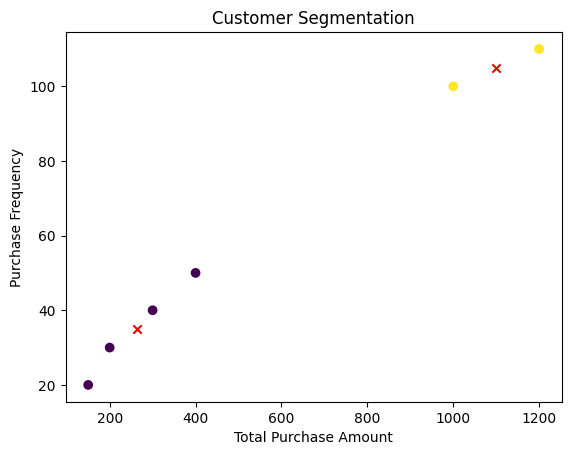

In [ ]:
"""
K-Means 聚类
"""
from sklearn.cluster import KMeans
import numpy as np
import os 

os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# 生成示例数据（客户购买行为：总购买额、购买频率）
X = np.array([[200, 30], [150, 20], [300, 40], [1000, 100], [1200, 110], [400, 50]])

# 创建 K-Means 聚类模型
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# 获取聚类结果
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 输出结果
print("客户分群标签:", labels)
print("聚类中心:", centers)

import matplotlib.pyplot as plt
# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
# 绘制聚类中心
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.title('Customer Segmentation')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Purchase Frequency')
plt.show()

### PCA/POD

主成分分析（Principal component analysis, PCA）是一种统计学和机器学习中常用的降维技术，主要用于数据的特征提取和数据压缩。它通过线性变换将原始数据映射到一个新的坐标系中，使得数据在这些新坐标轴上的方差尽可能大，同时这些坐标轴（称为主成分）彼此正交。



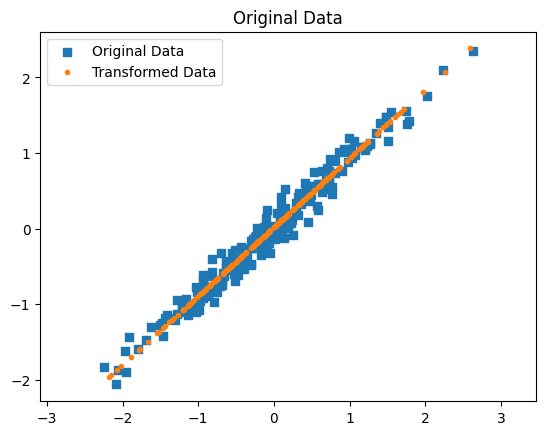

In [ ]:
"""
PCA 主成分分析 降维
"""
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 生成二维数据，第一个特征和第二个特征相关性较高
np.random.seed(0)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T

pca = PCA(n_components=1)
pca.fit(X)

# 将数据转换到主成分上
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], marker='s', label='Original Data')
plt.scatter(X_new[:, 0], X_new[:, 1], marker='.', label='Transformed Data')
plt.legend()
plt.title('Original Data')
plt.axis('equal')
plt.show()


### 强化学习（Reinforcement Learning）

强化学习是一种通过智能体（Agent）与环境（Environment）交互来学习策略的机器学习方法。智能体通过试探性行动，观察环境的反馈（奖励或惩罚），逐步学习如何在环境中采取最优行动以获得最大化的长期收益。

#### 特点：
- **数据特点**：强化学习没有明确的训练数据，智能体通过与环境的交互，逐步积累经验。
- **目标**：找到能够最大化累计奖励的策略（Policy）。
- **关键要素**：
  - **状态（State）**：智能体在环境中的当前状态。
  - **动作（Action）**：智能体在当前状态下可以采取的行为。
  - **奖励（Reward）**：环境对智能体采取某行动的反馈信号。
  - **策略（Policy）**：智能体根据状态选择动作的规则。
  - **价值函数（Value Function）**：评估某一状态或动作的长期收益。

#### 常见算法：
- **基于价值的算法**：Q学习、深度Q网络（DQN）。
- **基于策略的算法**：策略梯度（Policy Gradient）、演员-评论家（Actor-Critic）。
- **模型自由算法**：直接学习最优策略或价值函数。
- **模型基算法**：通过学习环境的动态模型进行规划。

#### 应用场景：
- **游戏AI**：AlphaGo通过强化学习击败人类顶级围棋选手。
- **自动驾驶**：优化汽车的驾驶行为，例如避开障碍物和选择最佳路径。
- **机器人控制**：通过学习，机器人能够完成复杂任务，如行走、抓取物体。
- **动态资源分配**：在数据中心实现能耗优化。

#### CartPole-v1

在给出强化学习的示例之前，介绍一下CartPole-v1：CartPole-v1 是一种经典的强化学习环境，广泛用于测试和比较各种强化学习算法。它最早由 OpenAI 在其 Gym 库中实现，是一种简单但具有挑战性的控制问题。

CartPole 的目标是尽可能长时间保持杆的平衡。
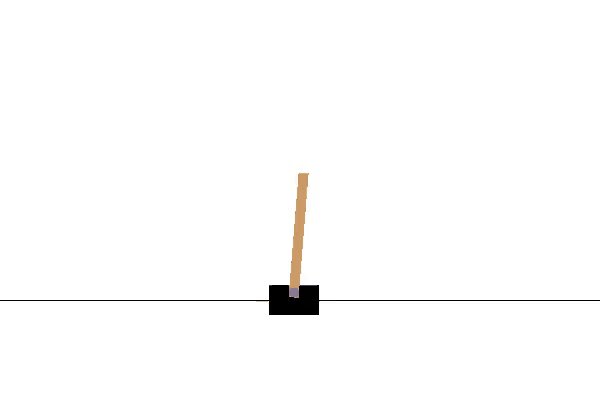

##### 游戏胜利条件：
以下任意条件满足时，回合（episode）结束：
1. 杆的角度偏离垂直方向超过 ±12°。
2. 小车偏离轨道范围（位置在 ±2.4 之间）。
3. 回合的时间步数达到 500（即最多可以获得 500 分奖励）。

##### 状态空间
CartPole-v1 的状态由一个 4 维向量表示：
1. 小车的位置（cart position）：小车在轨道上的水平位置。
2. 小车的速度（cart velocity）：小车的水平速度。
3. 杆的角度（pole angle）：杆相对于垂直方向的角度。
4. 杆的角速度（pole angular velocity）：杆的旋转速度。

##### 控制空间
CartPole 是一个离散动作空间问题，有两个可能的动作：
1. 0：向左施加力。
2. 1：向右施加力。

In [31]:
import gymnasium as gym

# 创建环境
env = gym.make("CartPole-v1", render_mode = "rgb_array")

# 用于录制视频
env = gym.wrappers.RecordVideo(
    env, 
    "assets/videos/CartPole-v1-random-agent",
    episode_trigger=lambda episode_id: True
)

# 初始化环境
state = env.reset()
done = False
steps = 0

# 简单的随机策略示例
while not done:
    # 渲染环境
    env.render()

    # 随机选择一个动作 (0 或 1)
    action = env.action_space.sample()

    # 执行动作，获取新状态和奖励
    state, reward, done, truncated , info = env.step(action)
    steps += 1

print(f"游戏结束，总步数: {steps}")
env.close()

c:\Users\40841\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at c:\GitRepository\AI-CFD-COURSE\assets\videos\CartPole-v1-random-agent folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


游戏结束，总步数: 45


<video controls src="assets/videos/CartPole-v1-random-agent/rl-video-episode-0.mp4" title="Title"></video>

### Q-learning
Q-Learning 是一种基于表格的强化学习算法，通过更新 Q 表 来估计每个状态-动作对的价值。

#### 关键概念：
1. Q-value: 表示在某个状态 𝑠 下采取动作 𝑎 后，智能体未来所能获得的期望累积奖励。
2. V-value: 表示在状态 𝑠 下，按照当前策略 𝜋 （最优策略）执行的期望累积奖励。

Q-value的更新公式如下：
$$
Q(s, a) = Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
$$
* $\alpha$: 学习率，控制更新的步长。
* $r$: 当前动作的即时奖励。
* $\gamma$: 折扣因子。
* $\max_{a'} Q(s', a')$: 下一个状态 𝑠′中最优动作的 Q 值。

In [32]:
"""
训练Q-Learning智能体解决CartPole问题
"""

import gymnasium as gym
import math
import numpy as np

# 创建环境
env = gym.make("CartPole-v1")

# 超参数
n_bins = [20, 20, 40, 40]  # 每个状态变量的离散化级别
learning_rate = 0.1        # 学习率
discount_factor = 0.99     # 折扣因子
epsilon = 1.0              # 初始 ε 值（探索）
epsilon_min = 0.3          # 最小 ε 值
epsilon_decay = 0.995      # ε 衰减率
n_episodes = 20000         # 训练回合数
max_steps = 500            # 每个回合的最大步数

# 状态空间的范围（用于离散化）
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]  # 限制速度范围
state_bounds[3] = [-math.radians(50), math.radians(50)]  # 限制角速度范围

q_table = np.random.uniform(low=-1, high=1, size=tuple(n_bins) + (env.action_space.n,))

# 状态离散化函数
def discretize_state(state):
    """将连续状态转换为离散状态"""
    discretized = []
    for i, (low, high) in enumerate(state_bounds):
        if state[i] <= low:
            index = 0
        elif state[i] >= high:
            index = n_bins[i] - 1
        else:
            scale = (state[i] - low) / (high - low)
            index = int(scale * (n_bins[i] - 1))
        discretized.append(index)
    return tuple(discretized)

# ε-greedy 策略
def choose_action(state, epsilon):
    """根据 ε-greedy 策略选择动作"""
    if np.random.random() < epsilon:
        return env.action_space.sample()  # 随机动作
    else:
        return np.argmax(q_table[state])  # 最优动作

# Q-Learning 训练
for episode in range(n_episodes):
    state = discretize_state(env.reset(seed=42)[0])  # 重置环境并离散化初始状态
    done = False
    total_reward = 0

    for step in range(max_steps):
        # 根据当前状态选择动作
        action = choose_action(state, epsilon)

        # 执行动作，获得下一个状态和奖励
        next_state, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state)

        # 更新 Q 表
        best_next_action = np.argmax(q_table[next_state])
        q_table[state + (action,)] += learning_rate * (
            reward + discount_factor * q_table[next_state + (best_next_action,)] - q_table[state + (action,)]
        )

        # 状态转移
        state = next_state
        total_reward += reward

        if done:
            break

    # ε 衰减
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # 打印训练进度
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

# 保存q_table
np.save("assets/q_table.npy", q_table)

# 关闭环境
env.close()

Episode: 100, Total Reward: 16.0, Epsilon: 0.606
Episode: 200, Total Reward: 9.0, Epsilon: 0.367
Episode: 300, Total Reward: 16.0, Epsilon: 0.300
Episode: 400, Total Reward: 17.0, Epsilon: 0.300
Episode: 500, Total Reward: 12.0, Epsilon: 0.300
Episode: 600, Total Reward: 11.0, Epsilon: 0.300
Episode: 700, Total Reward: 38.0, Epsilon: 0.300
Episode: 800, Total Reward: 9.0, Epsilon: 0.300
Episode: 900, Total Reward: 16.0, Epsilon: 0.300
Episode: 1000, Total Reward: 15.0, Epsilon: 0.300
Episode: 1100, Total Reward: 10.0, Epsilon: 0.300
Episode: 1200, Total Reward: 9.0, Epsilon: 0.300
Episode: 1300, Total Reward: 17.0, Epsilon: 0.300
Episode: 1400, Total Reward: 15.0, Epsilon: 0.300
Episode: 1500, Total Reward: 18.0, Epsilon: 0.300
Episode: 1600, Total Reward: 35.0, Epsilon: 0.300
Episode: 1700, Total Reward: 23.0, Epsilon: 0.300
Episode: 1800, Total Reward: 12.0, Epsilon: 0.300
Episode: 1900, Total Reward: 34.0, Epsilon: 0.300
Episode: 2000, Total Reward: 24.0, Epsilon: 0.300
Episode: 210

In [33]:
# 读取q_table
q_table = np.load("assets/q_table.npy")

# 创建环境
env = gym.make("CartPole-v1", render_mode = "rgb_array")

# 用于录制视频
env = gym.wrappers.RecordVideo(
    env, 
    "assets/videos/CartPole-v1-q-learning",
    episode_trigger=lambda episode_id: True
)

state = discretize_state(env.reset(seed=42)[0])
done = False
step = 0
while not done:
    env.render()
    action = np.argmax(q_table[state])
    state, _, done, _, _ = env.step(action)
    state = discretize_state(state)
    step += 1

print(f"游戏结束，总步数: {step}")
env.close()

c:\Users\40841\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at c:\GitRepository\AI-CFD-COURSE\assets\videos\CartPole-v1-q-learning folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


游戏结束，总步数: 963


<video controls src="assets/videos/CartPole-v1-q-learning/rl-video-episode-0.mp4" title="Title"></video>

### 三者对比

| 特点                | 监督学习                      | 无监督学习                  | 强化学习                  |
|---------------------|------------------------------|----------------------------|--------------------------|
| **数据需求**        | 需要带标签的数据             | 不需要标签，仅需输入数据   | 不需要标签，通过交互获取奖励 |
| **目标**            | 预测或分类                  | 探索数据内在结构           | 最大化累计奖励             |
| **应用对象**        | 静态数据                    | 静态数据                   | 动态环境                  |
| **常见方法**        | 回归、分类                  | 聚类、降维                 | 策略优化、Q学习           |
| **应用场景**        | 图像识别、预测任务          | 客户分群、异常检测         | 游戏AI、机器人控制         |

这三种学习方法分别适用于不同类型的问题和场景，构成了机器学习的重要基础。